## 1. Image Data Handling

In [1]:
%pylab inline

import pandas as pd
from glob import glob

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, InputLayer, \
    Convolution2D, MaxPooling2D, Flatten
    
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# To stop potential randomness
seed = 42
rng = np.random.RandomState(seed)

In [3]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [4]:
emergency_vehicles = glob('../datasets/emergency_classification/images/Emergency/*.jpg')
nonemergency_vehicles = glob('../datasets/emergency_classification/images/Non-Emergency/*.jpg')

In [5]:
len(emergency_vehicles), len(nonemergency_vehicles)

(991, 1361)

In [6]:
all_vehicles = emergency_vehicles + nonemergency_vehicles

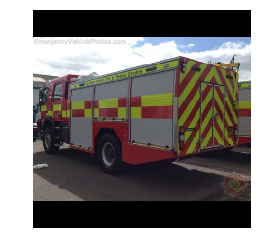

In [7]:
img_name = rng.choice(all_vehicles)

img = imread(img_name)

pylab.imshow(img)
pylab.axis('off')
pylab.show()

## 2. Data Loading and Preprocessing

In [8]:
images = []
for img_loc in data.images:
    img = image.load_img('../datasets/emergency_classification/' + img_loc)
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [9]:
images.shape

(2352, 224, 224, 3)

In [10]:
train_x = images / images.max()
train_y = data.emergency_or_not.values

In [11]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

## 3. Model Building

In [12]:
model = Sequential([
 InputLayer(input_shape=(224, 224, 3)),

 Convolution2D(25, (5, 5), activation='relu'),
 Convolution2D(50, (5, 5), activation='relu'),
    
 Flatten(),
    
 Dense(units=100, activation='sigmoid'),
 Dense(units=1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2332800)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               233280100 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 13s 8ms/step - loss: 0.6368 - acc: 0.6701 - val_loss: 0.5861 - val_acc: 0.6955
Epoch 2/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.5546 - acc: 0.7272 - val_loss: 0.5867 - val_acc: 0.6926
Epoch 3/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.5451 - acc: 0.7369 - val_loss: 0.5966 - val_acc: 0.6898
Epoch 4/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.5407 - acc: 0.7448 - val_loss: 0.5721 - val_acc: 0.7040
Epoch 5/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.5290 - acc: 0.7558 - val_loss: 0.5694 - val_acc: 0.7040
Epoch 6/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.5061 - acc: 0.7637 - val_loss: 0.5573 - val_acc: 0.7210
Epoch 7/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.4945 - acc: 0.7722 - val_loss: 0.5885 - val_acc: 0.7054
Epoch 8/10
164

In [15]:
model = Sequential([
 InputLayer(input_shape=(224, 224, 3)),

 Convolution2D(25, (5, 5), activation='relu'),
 Convolution2D(50, (5, 5), activation='relu'),
 MaxPooling2D((4, 4)),
    
 Flatten(),
    
 Dense(units=100, activation='sigmoid'),
 Dense(units=1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               14580100  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 14,613,401
Trainable params: 14,613,401
Non-trainable params: 0
________________________________________________________________

In [17]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6451 - acc: 0.6312 - val_loss: 0.6124 - val_acc: 0.6884
Epoch 2/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.5775 - acc: 0.7205 - val_loss: 0.5864 - val_acc: 0.6941
Epoch 3/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.5621 - acc: 0.7272 - val_loss: 0.5860 - val_acc: 0.6941
Epoch 4/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.5528 - acc: 0.7309 - val_loss: 0.6060 - val_acc: 0.6813
Epoch 5/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.5533 - acc: 0.7290 - val_loss: 0.5795 - val_acc: 0.7011
Epoch 6/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.5387 - acc: 0.7479 - val_loss: 0.5849 - val_acc: 0.7054
Epoch 7/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.5336 - acc: 0.7400 - val_loss: 0.6166 - val_acc: 0.6827
Epoch 8/10
1646

In [18]:
predictions = model.predict_classes(X_valid).ravel()
prediction_probabilities = model.predict(X_valid).ravel()
all_vehicles = np.array(emergency_vehicles + nonemergency_vehicles)

_, valid_vehicles, _, valid_y = train_test_split(all_vehicles,train_y,test_size=0.3, random_state=42)

21 % sure that it is emergency


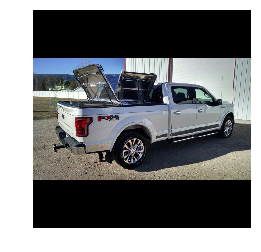

In [19]:
correct_predictions = valid_vehicles[predictions == Y_valid]

index = rng.choice(range(len(correct_predictions)))
img_name = correct_predictions[index]


prob = (prediction_probabilities[predictions == Y_valid] * 100).astype(int)[index]

img = imread(img_name)

print(prob , '% sure that it is emergency')
pylab.imshow(img)
pylab.axis('off')
pylab.show()

31 % sure that it is emergency


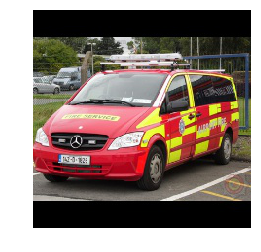

In [20]:
incorrect_predictions = valid_vehicles[predictions != Y_valid]
index = rng.choice(range(len(incorrect_predictions)))
img_name = incorrect_predictions[index]


prob = (prediction_probabilities[predictions != Y_valid] * 100).astype(int)[index]

img = imread(img_name)

print(prob , '% sure that it is emergency')
pylab.imshow(img)
pylab.axis('off')
pylab.show()

## 4. Hyperparameter Tuning

In [24]:
# increase number of layers
model = Sequential([
    InputLayer(input_shape=(224, 224, 3)),

    Convolution2D(25, (5, 5), activation='relu'),
    MaxPooling2D((4, 4)),
    
    Convolution2D(50, (5, 5), activation='relu'),
    MaxPooling2D((4, 4)),
    
    Convolution2D(100, (5, 5), activation='relu'),
    MaxPooling2D((4, 4)),
    
    Flatten(),
    
    Dense(units=100, activation='sigmoid'),
    Dense(units=1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 25)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 51, 51, 50)        31300     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 100)         125100    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 100)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
__________

In [26]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6556 - acc: 0.6239 - val_loss: 0.5916 - val_acc: 0.6884
Epoch 2/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5512 - acc: 0.7272 - val_loss: 0.5393 - val_acc: 0.7224
Epoch 3/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.4582 - acc: 0.7855 - val_loss: 0.4535 - val_acc: 0.7734
Epoch 4/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.4275 - acc: 0.7971 - val_loss: 0.4448 - val_acc: 0.7833
Epoch 5/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.3806 - acc: 0.8329 - val_loss: 0.4029 - val_acc: 0.8229
Epoch 6/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.3301 - acc: 0.8505 - val_loss: 0.3760 - val_acc: 0.8258
Epoch 7/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.3101 - acc: 0.8651 - val_loss: 0.3691 - val_acc: 0.8258
Epoch 8/50
1646

KeyboardInterrupt: 

In [27]:
# increase number of layers and neurons
model = Sequential([
    InputLayer(input_shape=(224, 224, 3)),

    Convolution2D(125, (5, 5), activation='relu'),
    MaxPooling2D((4, 4)),
    
    Convolution2D(150, (5, 5), activation='relu'),
    MaxPooling2D((4, 4)),
    
    Convolution2D(200, (5, 5), activation='relu'),
    MaxPooling2D((4, 4)),
    
    Flatten(),
    
    Dense(units=1024, activation='sigmoid'),
    Dense(units=1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 220, 220, 125)     9500      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 55, 55, 125)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 51, 51, 150)       468900    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 150)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 200)         750200    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 200)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
__________

In [29]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6653 - acc: 0.6136 - val_loss: 0.5764 - val_acc: 0.7295
Epoch 2/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.5398 - acc: 0.7454 - val_loss: 0.4793 - val_acc: 0.7521
Epoch 3/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.4515 - acc: 0.7971 - val_loss: 0.4155 - val_acc: 0.8102
Epoch 4/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.3835 - acc: 0.8305 - val_loss: 0.3661 - val_acc: 0.8314
Epoch 5/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.3437 - acc: 0.8426 - val_loss: 0.3624 - val_acc: 0.8343
Epoch 6/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.3140 - acc: 0.8578 - val_loss: 0.3534 - val_acc: 0.8484
Epoch 7/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.2578 - acc: 0.8888 - val_loss: 0.3084 - val_acc: 0.8754
Epoch 8/10
1646

In [30]:
# change padding
model = Sequential([
    InputLayer(input_shape=(224, 224, 3)),

    Convolution2D(125, (5, 5), activation='relu', padding='same'),
    MaxPooling2D((4, 4)),
    
    Convolution2D(150, (5, 5), activation='relu', padding='same'),
    MaxPooling2D((4, 4)),
    
    Convolution2D(200, (5, 5), activation='relu', padding='same'),
    MaxPooling2D((4, 4)),
    
    Flatten(),
    
    Dense(units=1024, activation='sigmoid'),
    Dense(units=1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 125)     9500      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 125)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 56, 56, 150)       468900    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 150)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 200)       750200    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 200)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1800)              0         
__________

In [32]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6624 - acc: 0.6051 - val_loss: 0.5769 - val_acc: 0.7167
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5316 - acc: 0.7503 - val_loss: 0.4940 - val_acc: 0.7564
Epoch 3/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.4502 - acc: 0.7801 - val_loss: 0.4886 - val_acc: 0.7521
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.3966 - acc: 0.8098 - val_loss: 0.4190 - val_acc: 0.8116
Epoch 5/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.3517 - acc: 0.8475 - val_loss: 0.3828 - val_acc: 0.8173
Epoch 6/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.3075 - acc: 0.8676 - val_loss: 0.3928 - val_acc: 0.8130
Epoch 7/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.3025 - acc: 0.8755 - val_loss: 0.4245 - val_acc: 0.8031
Epoch 8/10
1646

## 5. Comparison with Pre-trained model

![](images/pretrained_result.png)